## <font color=#225e71>Applying the Elbow curve, in order to select the proper number of clusters</font>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import random


In [16]:
data = pd.read_csv(r"C:\\Users\\Giorgis\\Desktop\\Projects\\ADTA coursework\\partI\\Census.csv")
data = data[(data['No of hours'].notna())]
data

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
302321,7394645,E12000001,H,5,1,2,5,4,2,1,3,1,2,2,7,7,1,2.0,4
302322,7394688,E12000001,H,2,1,2,2,1,1,1,1,1,9,4,7,4,1,1.0,2
302323,7394756,E12000001,H,2,1,2,5,2,2,1,3,1,1,1,9,9,1,10.0,4
302324,7394737,E12000001,H,2,1,2,6,2,2,1,1,1,2,1,9,11,1,3.0,4
302325,7394536,E12000001,H,5,1,2,6,3,2,1,2,1,1,1,9,10,1,8.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569735,7680019,E12000008,C,-9,1,1,2,1,2,2,1,1,2,1,3,9,4,52.0,-9
569736,7675184,E12000008,C,-9,1,1,3,1,2,2,2,2,1,1,1,5,4,55.0,-9
569737,7675176,E12000008,C,-9,1,2,5,2,2,1,1,1,2,2,1,8,4,49.0,-9
569738,7944614,W92000004,H,2,1,1,6,2,2,1,3,1,1,1,6,10,4,53.0,3


## <font color=#225e71>Selecting the number of clusters</font>

In [17]:
no_of_hrs = pd.DataFrame(data['No of hours'])
no_of_hrs.head()

,No of hours
302321,2.0
302322,1.0
302323,10.0
302324,3.0
302325,8.0


In [18]:
data = data.drop(['Person ID', 'Region', 'Residence Type'], axis=1)


#### <font color=#225e71>we are going to select 16000 random numbers from the remaining rows of the dataset. This will be applied due to memory error of DBSCAN algorithm </font>

In [27]:
my_data_list = []

for i in range(0,16000):
    x = random.randint(data.index[0],data.index[-1])
    my_data_list.append(x)

In [33]:
Data = data.loc[ my_data_list , : ]

In [34]:
Data

,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
408640,3,1,2,5,4,2,1,2,1,9,1,6,11,3,48.0,3
365559,2,1,2,4,2,2,1,1,1,2,2,3,4,2,22.0,2
494056,2,1,1,6,2,2,1,2,1,1,2,2,8,3,37.0,1
560557,2,1,1,4,2,2,2,1,3,6,1,2,11,4,57.0,1
546534,1,1,1,6,4,2,2,1,1,2,1,8,4,4,52.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385474,2,1,1,4,2,2,2,3,1,1,1,2,2,3,41.0,1
365580,1,1,1,4,1,2,1,2,1,2,2,5,3,2,17.0,3
338658,2,1,1,6,2,2,1,2,1,2,1,9,9,2,17.0,4
508445,1,1,1,4,1,2,2,2,1,2,1,8,4,3,37.0,4


#### <font color=#225e71>Exporting this dataframe as csv file in order to use it for completing the classification task</font>


In [43]:
Data.to_csv(r'C:\Users\Giorgis\Desktop\Projects\ADTA coursework\partI\Clustering\Data.csv', index=False)


#### <font color=#225e71>a loop that calculates and saves the WCSS for any number of clusters from 1 up to 7.</font>


In [38]:
wcss = []
"""
'cl_num' is a that keeps track the highest number of clusters 
we want to use the WCSS method for.
"""
cl_num = 7
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(data)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [39]:
wcss

[57247648.38108053,
 24443292.01677947,
 15745288.399583725,
 12923382.197198503,
 10737951.964378187,
 9901674.50745332]

Text(0, 0.5, 'Within-cluster Sum of Squares')

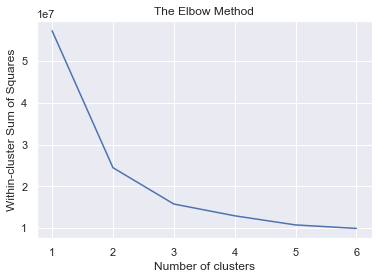

In [40]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')


#### <font color=#225e71>In this this specific case, the most fitted number of clusters would be 2 or 3.</font>
